## Markov Chain Analysis of Accounts Receivable and Payment Expectancy

In [2]:
import numpy as np
import pandas as pd

# Define the transition matrix (states: Current, 1 Month, 2 Months, 3 Months, 4 Months, Paid, Bad Debt)
states = ['Current', '1 Month', '2 Months', '3 Months', '4 Months', 'Paid', 'Bad Debt']

P = pd.DataFrame([
    [0.4, 0.5, 0.0, 0.0, 0.0, 0.1, 0.0],     # Current
    [0.0, 0.3, 0.5, 0.0, 0.0, 0.2, 0.0],     # 1 Month
    [0.0, 0.0, 0.4, 0.4, 0.0, 0.2, 0.0],     # 2 Months
    [0.0, 0.0, 0.0, 0.6, 0.3, 0.1, 0.0],     # 3 Months
    [0.0, 0.0, 0.0, 0.0, 0.7, 0.05, 0.25],   # 4 Months
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],     # Paid (absorbing)
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]      # Bad Debt (absorbing)
], columns=states, index=states)

print("Transition Matrix:")
print(P)

# Extract transient and absorbing states
transient_states = ['Current', '1 Month', '2 Months', '3 Months', '4 Months']
absorbing_states = ['Paid', 'Bad Debt']

# Q: Transient to transient
Q = P.loc[transient_states, transient_states].values

# R: Transient to absorbing
R = P.loc[transient_states, absorbing_states].values

# Fundamental matrix N = (I - Q)^-1
I = np.eye(len(Q))
N = np.linalg.inv(I - Q)

# Expected time before absorption
expected_duration = N.sum(axis=1)

# Absorption probabilities matrix
B = N @ R

# Initial receivables vector
b = np.array([300, 200, 300, 400, 250, 150])  # Last entry is in Bad Debt already

# Calculate expected amount to be paid
paid_probabilities = B[:, 0]
expected_paid_amount = np.dot(b[:5], paid_probabilities)

# Prepare DataFrame for result visualization
results_df = pd.DataFrame({
    'State': transient_states,
    'Expected Duration': expected_duration,
    'P(Paid)': paid_probabilities,
    'P(Bad Debt)': B[:, 1],
    'Receivable ($)': b[:5],
    'Expected Paid ($)': b[:5] * paid_probabilities
})

print("\nResults Summary:")
print(results_df.to_string(index=False))
print(f"\nTotal Expected Paid Amount: ${expected_paid_amount:.2f}")

Transition Matrix:
          Current  1 Month  2 Months  3 Months  4 Months  Paid  Bad Debt
Current       0.4      0.5       0.0       0.0       0.0  0.10      0.00
1 Month       0.0      0.3       0.5       0.0       0.0  0.20      0.00
2 Months      0.0      0.0       0.4       0.4       0.0  0.20      0.00
3 Months      0.0      0.0       0.0       0.6       0.3  0.10      0.00
4 Months      0.0      0.0       0.0       0.0       0.7  0.05      0.25
Paid          0.0      0.0       0.0       0.0       0.0  1.00      0.00
Bad Debt      0.0      0.0       0.0       0.0       0.0  0.00      1.00

Results Summary:
   State  Expected Duration  P(Paid)  P(Bad Debt)  Receivable ($)  Expected Paid ($)
 Current           5.833333 0.751984     0.248016             300         225.595238
 1 Month           5.000000 0.702381     0.297619             200         140.476190
2 Months           5.000000 0.583333     0.416667             300         175.000000
3 Months           5.000000 0.375000   

## Graph Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_9024\3229376850.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


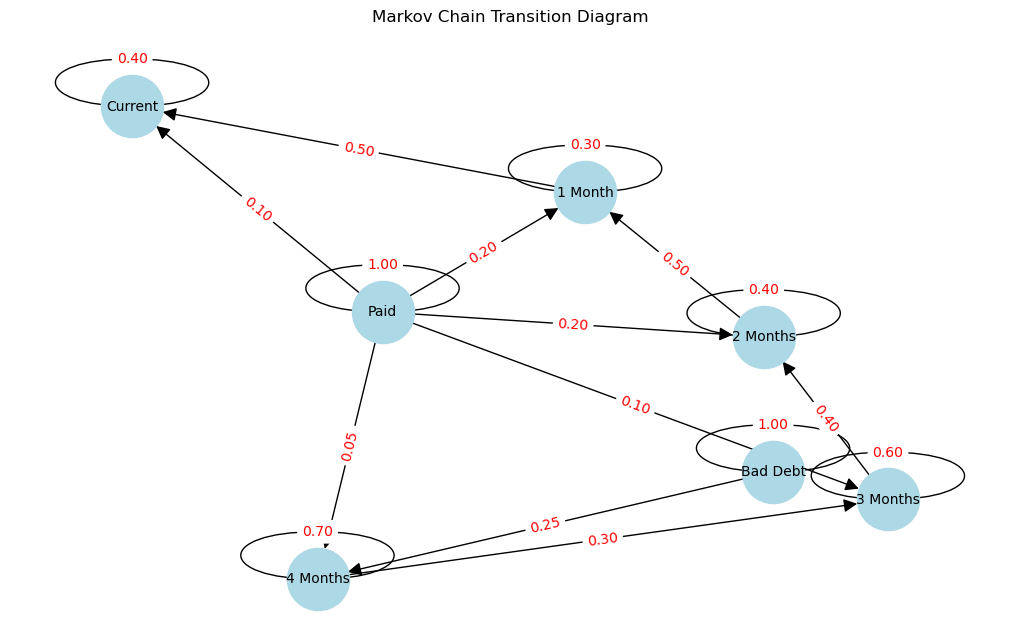

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Add edges with probabilities
for from_state, to_states in P.items():
    for to_state, prob in to_states.items():
        if prob > 0:
            G.add_edge(from_state, to_state, weight=prob, label=f"{prob:.2f}")

# Layout and plot
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Markov Chain Transition Diagram")
plt.tight_layout()
plt.show()